### 0. Library

In [ ]:
# !pip install requirements.txt

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import StratifiedKFold

from scipy.stats import skew

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

### 1. Importing Dataset

In [1708]:
df = pd.read_csv(r"C:\Users\Bagas\Documents\My Room\Semester 5\SML\Week 6\tugas-1-sml-a-2025\train.csv")
df

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,VM684,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1,1676,...,80,3,29,2,3,3,2,1,2,0
1,ZO618,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,1,169,...,80,1,3,2,3,2,1,2,1,0
2,JO233,46,Travel_Rarely,406,Sales,3,1,Marketing,1,1124,...,80,1,23,3,3,12,9,4,9,0
3,GW565,25,Travel_Rarely,622,Sales,13,1,Medical,1,645,...,80,0,7,1,3,7,4,0,6,0
4,OZ187,43,Travel_Frequently,1001,Research & Development,9,5,Medical,1,663,...,80,1,10,3,3,8,7,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,TB175,23,Travel_Rarely,427,Sales,7,3,Life Sciences,1,1702,...,80,1,3,2,3,3,2,0,2,1
1172,UC176,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,1355,...,80,1,11,3,3,7,7,1,7,0
1173,ER115,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,1019,...,80,1,4,3,2,4,3,1,1,0
1174,TG383,36,Travel_Rarely,430,Research & Development,2,4,Other,1,1847,...,80,1,15,2,3,1,0,0,0,0


In [1709]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1176 non-null   object
 1   Age                       1176 non-null   int64 
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel                

In [1710]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.998299,803.991497,9.357993,2.906463,1.0,1015.830782,2.716837,65.500000,2.737245,2.076531,...,80.0,0.790816,11.364796,2.760204,2.757653,7.050170,4.231293,2.182823,4.196429,0.161565
std,9.178142,401.339423,8.179803,1.027996,0.0,599.657438,1.088707,20.373324,0.703673,1.091987,...,0.0,0.845786,7.801391,1.256262,0.718113,6.086612,3.569503,3.215348,3.564795,0.368208
min,18.000000,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,467.750000,2.000000,2.000000,1.0,487.750000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,799.500000,7.000000,3.000000,1.0,1004.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1547.250000,4.000000,83.000000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2062.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,17.000000,15.000000,17.000000,1.000000


In [1711]:
drop_cols = ['id', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=drop_cols, inplace=True)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,47,...,3,3,29,2,3,3,2,1,2,0
1,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,100,...,3,1,3,2,3,2,1,2,1,0
2,46,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,52,...,4,1,23,3,3,12,9,4,9,0
3,25,Travel_Rarely,622,Sales,13,1,Medical,2,Male,40,...,3,0,7,1,3,7,4,0,6,0
4,43,Travel_Frequently,1001,Research & Development,9,5,Medical,4,Male,72,...,2,1,10,3,3,8,7,4,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,23,Travel_Rarely,427,Sales,7,3,Life Sciences,3,Male,99,...,2,1,3,2,3,3,2,0,2,1
1172,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,2,Female,31,...,4,1,11,3,3,7,7,1,7,0
1173,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,2,Male,94,...,1,1,4,3,2,4,3,1,1,0
1174,36,Travel_Rarely,430,Research & Development,2,4,Other,4,Female,73,...,4,1,15,2,3,1,0,0,0,0


In [1712]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

cat_cols = X.select_dtypes('object').columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

cat_cols

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [1713]:
num_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [1714]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((823, 30), (353, 30), (823,), (353,))

### 2. Quick EDA

##### --- Missing Value

In [1715]:
df[cat_cols].nunique().sort_values()

Gender            2
OverTime          2
BusinessTravel    3
Department        3
MaritalStatus     3
EducationField    6
JobRole           9
dtype: int64

In [1716]:
print(df['Gender'].value_counts())
print(df['OverTime'].value_counts())
print(df['BusinessTravel'].value_counts())
print(df['Department'].value_counts())
print(df['MaritalStatus'].value_counts())
print(df['EducationField'].value_counts())
print(df['JobRole'].value_counts())

Gender
Male      704
Female    472
Name: count, dtype: int64
OverTime
No     836
Yes    340
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        828
Travel_Frequently    225
Non-Travel           123
Name: count, dtype: int64
Department
Research & Development    764
Sales                     364
Human Resources            48
Name: count, dtype: int64
MaritalStatus
Married     540
Single      373
Divorced    263
Name: count, dtype: int64
EducationField
Life Sciences       479
Medical             364
Marketing           134
Technical Degree    115
Other                62
Human Resources      22
Name: count, dtype: int64
JobRole
Sales Executive              273
Research Scientist           220
Laboratory Technician        215
Manufacturing Director       113
Healthcare Representative    108
Manager                       83
Research Director             63
Sales Representative          60
Human Resources               41
Name: count, dtype: int64


In [1717]:
df.isna().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

##### --- Duplikasi

In [1718]:
df.duplicated().sum()

0

#### --- Outlier

In [1719]:
outlier_counts = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    # Hitung jumlah outlier untuk kolom ini
    count = ((df[col] < batas_bawah) | (df[col] > batas_atas)).sum()
    outlier_counts[col] = count

# Tampilkan hasil
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Jumlah Outlier'])
print(outlier_df)

# Nantinya akan tertangani dengan transformation dan scaling

                          Jumlah Outlier
Age                                    0
DailyRate                              0
DistanceFromHome                       0
Education                              0
EnvironmentSatisfaction                0
HourlyRate                             0
JobInvolvement                         0
JobLevel                               0
JobSatisfaction                        0
MonthlyIncome                         86
MonthlyRate                            0
NumCompaniesWorked                    36
PercentSalaryHike                      0
PerformanceRating                    185
RelationshipSatisfaction               0
StockOptionLevel                      66
TotalWorkingYears                     52
TrainingTimesLastYear                174
WorkLifeBalance                        0
YearsAtCompany                        52
YearsInCurrentRole                    16
YearsSinceLastPromotion               85
YearsWithCurrManager                  10


#### --- Imbalance

In [1720]:
df['Attrition'].value_counts(normalize=True) * 100

Attrition
0    83.843537
1    16.156463
Name: proportion, dtype: float64

#### --- Insight

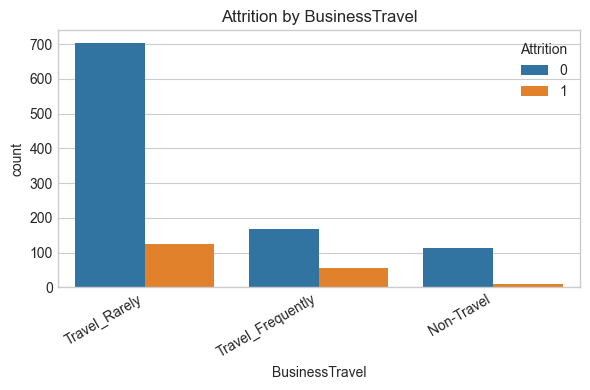

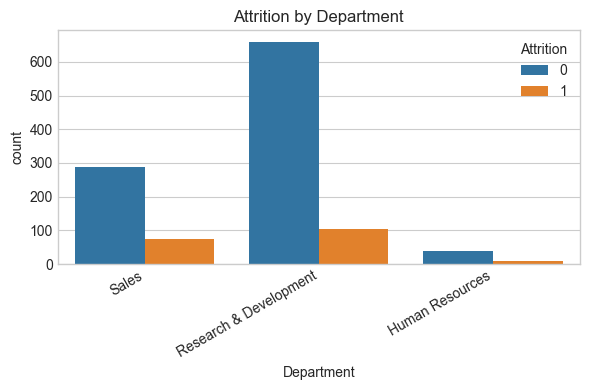

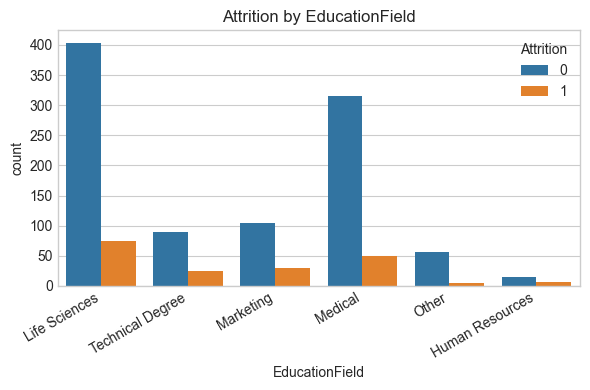

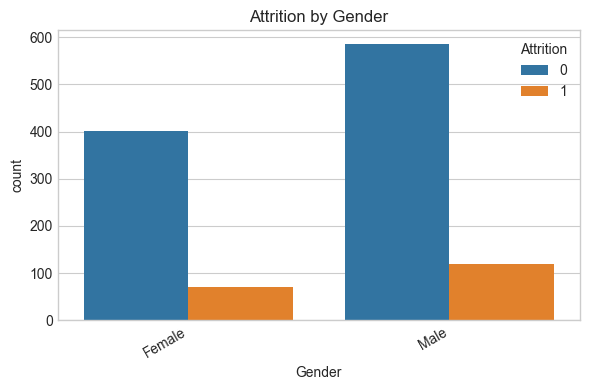

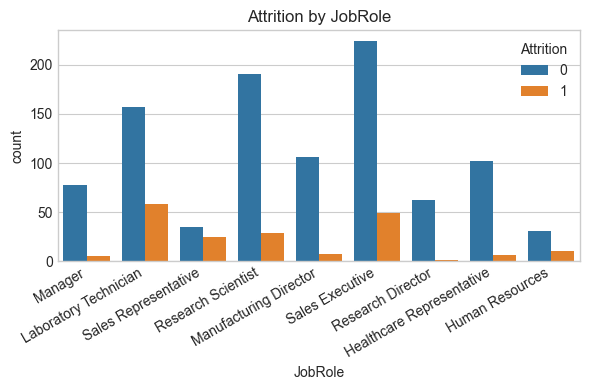

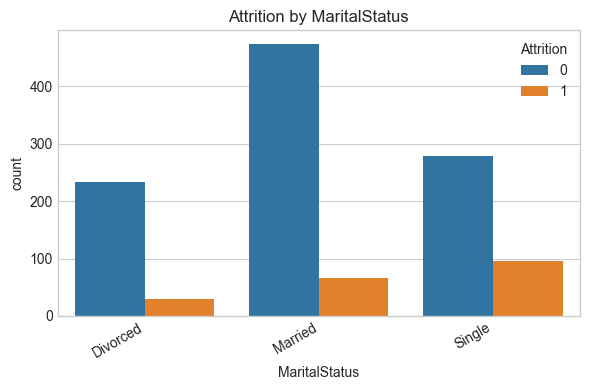

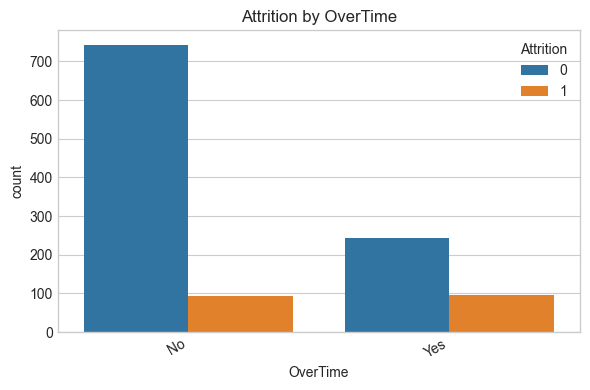

In [1721]:
# Setting gaya biar rapi
plt.style.use('seaborn-v0_8-whitegrid')

# Loop semua fitur
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Attrition')
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

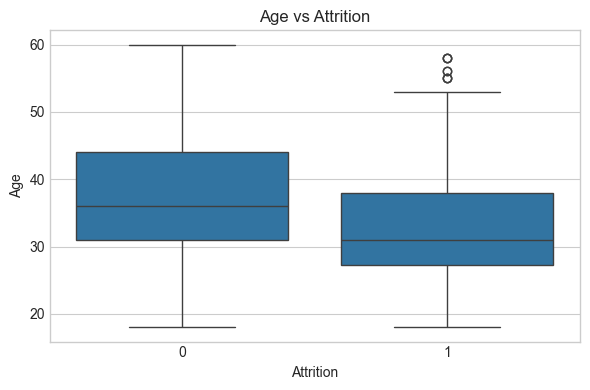

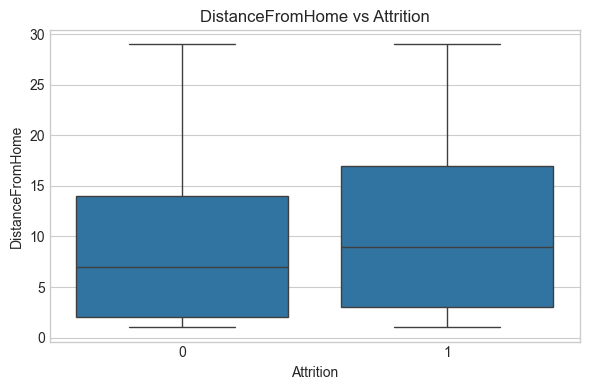

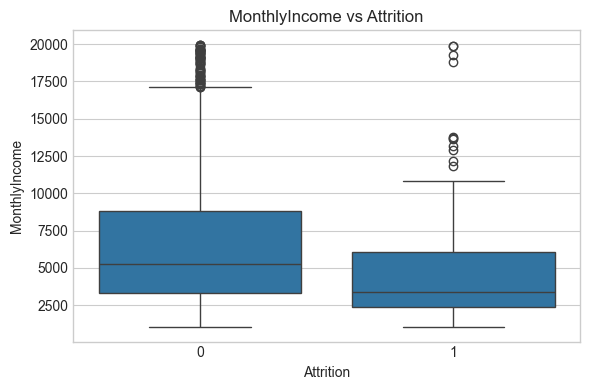

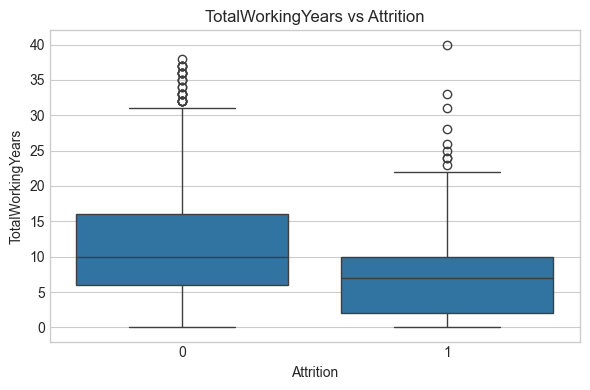

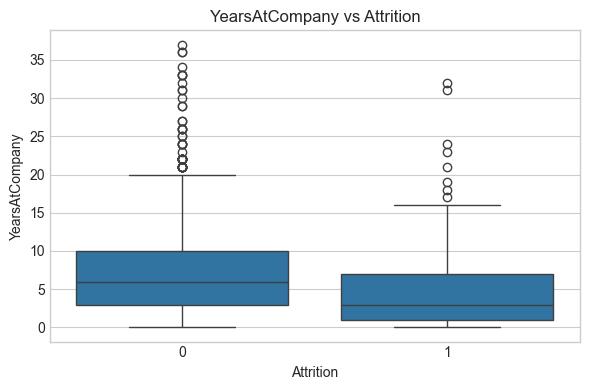

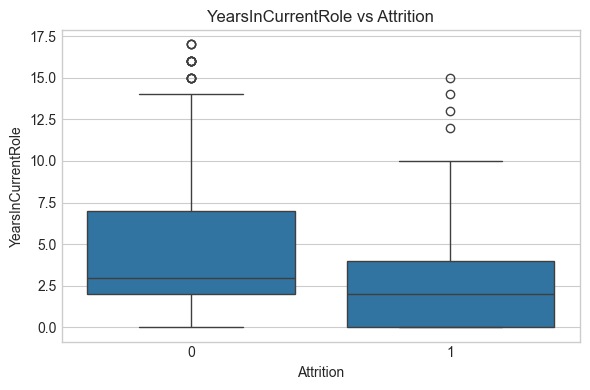

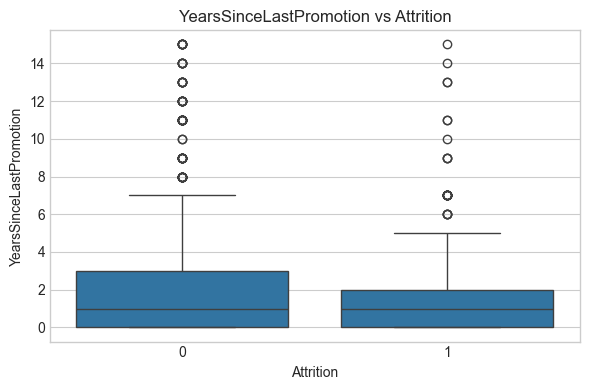

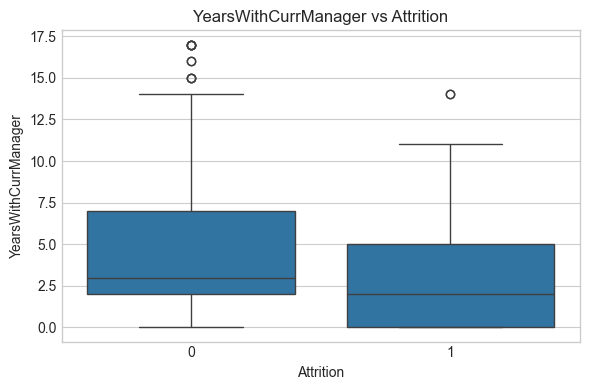

In [1722]:
# List fitur numerik yang penting aja
num_features = [
    'Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

plt.style.use('seaborn-v0_8-whitegrid')

for col in num_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Attrition', y=col)
    plt.title(f'{col} vs Attrition')
    plt.tight_layout()
    plt.show()

#### --- Korelasi

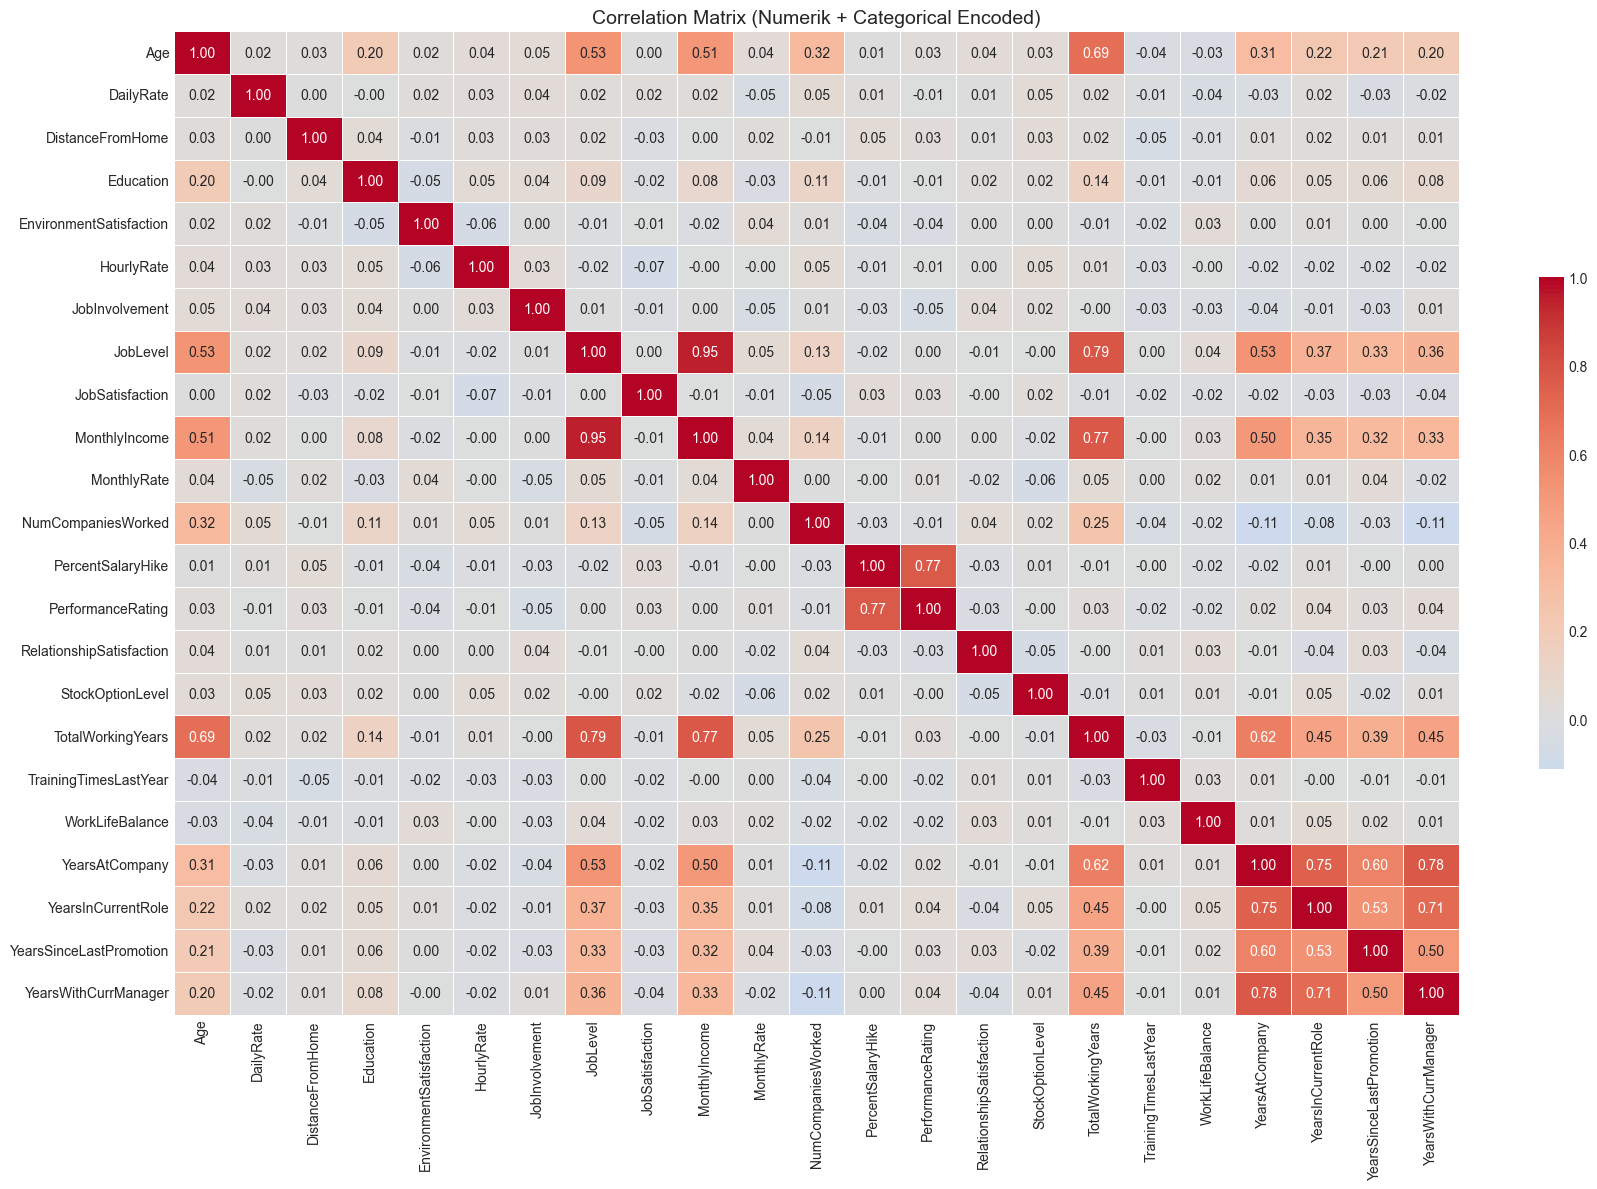

In [1723]:
# Ambil korelasi
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(18,12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot=True,
    fmt='.2f',
    cbar_kws={'shrink':0.5}
)
plt.title('Correlation Matrix (Numerik + Categorical Encoded)', fontsize=14)
plt.tight_layout()
plt.show()

### 3. Pre Processing

#### --- Transformation

In [1724]:
skew_threshold = 1.0
skewed_feats = []
for col in num_cols:
    if (X[col] <= 0).all():
        continue
    s = skew(X[col].dropna())
    if s > skew_threshold:
        skewed_feats.append(col)

print("Skewed numeric features (will apply log1p):", skewed_feats)
for c in skewed_feats:
    X_train[c] = np.log1p(X_train[c])
    X[c] = np.log1p(X[c])

X

Skewed numeric features (will apply log1p): ['MonthlyIncome', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,2,Female,47,...,1.386294,3,3,3.401197,2,3,1.386294,2,0.693147,2
1,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,3,Male,100,...,1.386294,3,1,1.386294,2,3,1.098612,1,1.098612,1
2,46,Travel_Rarely,406,Sales,3,1,Marketing,1,Male,52,...,1.386294,4,1,3.178054,3,3,2.564949,9,1.609438,9
3,25,Travel_Rarely,622,Sales,13,1,Medical,2,Male,40,...,1.386294,3,0,2.079442,1,3,2.079442,4,0.000000,6
4,43,Travel_Frequently,1001,Research & Development,9,5,Medical,4,Male,72,...,1.386294,2,1,2.397895,3,3,2.197225,7,1.609438,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,23,Travel_Rarely,427,Sales,7,3,Life Sciences,3,Male,99,...,1.609438,2,1,1.386294,2,3,1.386294,2,0.000000,2
1172,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,2,Female,31,...,1.386294,4,1,2.484907,3,3,2.079442,7,0.693147,7
1173,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,2,Male,94,...,1.386294,1,1,1.609438,3,2,1.609438,3,0.693147,1
1174,36,Travel_Rarely,430,Research & Development,2,4,Other,4,Female,73,...,1.609438,4,1,2.772589,2,3,0.693147,0,0.000000,0


#### --- Scaling and Encoding

In [1725]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X[num_cols]),
    columns=num_cols,
    index=X.index
)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(
    encoder.fit_transform(X[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X.index
)

X = pd.concat([X_scaled, X_encoded], axis=1)
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1.090194,1.049455,-0.899915,1.064209,-0.658710,-0.908436,1.795282,1.762189,-0.647997,1.690981,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.634828,-0.523449,-0.899915,-1.855332,0.260202,1.694111,0.373564,-0.986265,1.153526,-1.108058,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.981193,-0.992080,-0.777610,-1.855332,-1.577622,-0.662913,0.373564,1.762189,0.252765,1.826538,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-1.307825,-0.453653,0.445433,-1.855332,-0.658710,-1.252169,0.373564,-0.986265,0.252765,-1.389224,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.654191,0.491086,-0.043784,2.037390,1.179114,0.319180,0.373564,-0.070114,0.252765,0.122430,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,-1.525827,-0.939733,-0.288393,0.091029,0.260202,1.645007,0.373564,-0.986265,1.153526,-1.264960,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1172,0.109186,0.511028,-0.899915,-0.882152,-0.658710,-1.694111,0.373564,-0.070114,-1.548758,0.416282,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1173,-1.634828,-1.463203,-0.166088,-1.855332,-0.658710,1.399483,-2.469873,-0.986265,-1.548758,-1.151963,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1174,-0.108815,-0.932255,-0.899915,1.064209,1.179114,0.368285,0.373564,-0.070114,-0.647997,0.431391,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


#### --- Feature Selection

In [1726]:
logreg = LogisticRegression(
    penalty='l1',
    solver='saga',
    C=0.5,
    class_weight='balanced',
    random_state=42,
    max_iter=5000
)
logreg.fit(X, y)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=5000, penalty='l1',
                   random_state=42, solver='saga')

In [1727]:
selector = SelectFromModel(logreg, prefit=True, threshold='median')  
X_sel = selector.transform(X)

selected_features = X.columns[selector.get_support()]
print(f"Jumlah fitur terpilih: {len(selected_features)}")
print("Selected features:", list(selected_features))

Jumlah fitur terpilih: 26
Selected features: ['DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'YearsSinceLastPromotion', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Female', 'JobRole_Laboratory Technician', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Divorced', 'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes']


c:\Users\Bagas\.conda\envs\Envir_1\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [1728]:
coef = logreg.coef_[0]
features = X.columns

# Buat dataframe untuk interpretasi
feat_importance = pd.DataFrame({
    'feature': features,
    'coefficient': coef,
    'abs_coefficient': np.abs(coef)
})

# Urutkan berdasarkan besarnya pengaruh
feat_importance = feat_importance.sort_values(by='abs_coefficient', ascending=False)
feat_importance

,feature,coefficient,abs_coefficient
39,JobRole_Laboratory Technician,1.098719,1.098719
23,BusinessTravel_Non-Travel,-0.971853,0.971853
49,OverTime_No,-0.927838,0.927838
42,JobRole_Research Director,-0.869511,0.869511
24,BusinessTravel_Travel_Frequently,0.718650,0.718650
50,OverTime_Yes,0.649365,0.649365
16,TotalWorkingYears,-0.647855,0.647855
27,Department_Research & Development,-0.639213,0.639213
7,JobLevel,0.564716,0.564716
45,JobRole_Sales Representative,0.510656,0.510656


In [1729]:
X = pd.DataFrame(
    X_sel,
    columns=selected_features,
    index=X.index
)
X.shape

(1176, 26)

### 4. Modelling

In [1730]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((940, 26), (236, 26), (940,), (236,))

In [1731]:
smote = SMOTETomek(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [1732]:
X_train_res.shape, y_train_res.shape

((1574, 26), (1574,))

In [1733]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 5, 10]
}

In [1734]:
svm = SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True)
svm_grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    n_jobs=-1
)
svm_grid.fit(X_train_res, y_train_res)
best_model = svm_grid.best_estimator_
print("Best parameters:", svm_grid.best_params_)
print("Best ROC AUC score:", svm_grid.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'C': 0.1}
Best ROC AUC score: 0.8741999957889786


In [1735]:
# Calibrate the model
cal = CalibratedClassifierCV(best_model, cv=cv, method='isotonic')
cal.fit(X_train_res, y_train_res)

val_proba = cal.predict_proba(X_test)[:, 1]

# Determine optimal threshold based on F1 score
prec, rec, thr = precision_recall_curve(y_test, val_proba)
f1 = 2 * prec * rec / (prec + rec + 1e-12)
best_idx = np.argmax(f1)
best_thr = thr[best_idx] if best_idx < len(thr) else 0.5
print(f"Optimal threshold (by F1): {best_thr:.3f}")

# Evaluate with optimized threshold
val_preds_opt = (val_proba >= best_thr).astype(int)
print("\nClassification Report (threshold optimized):")
print(classification_report(y_test, val_preds_opt))

# Final evaluation with calibrated probabilities
val_auc_cal = roc_auc_score(y_test, val_proba)
print(f"Validation ROC AUC (calibrated): {val_auc_cal}")

val_scores = best_model.decision_function(X_test)
val_auc = roc_auc_score(y_test, val_scores)
print("Validation ROC AUC:", val_auc)

val_preds = (val_scores >= 0).astype(int)
print(classification_report(y_test, val_preds))

Optimal threshold (by F1): 0.706

Classification Report (threshold optimized):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       198
           1       0.65      0.63      0.64        38

    accuracy                           0.89       236
   macro avg       0.79      0.78      0.79       236
weighted avg       0.88      0.89      0.88       236

Validation ROC AUC (calibrated): 0.8488171185539606
Validation ROC AUC: 0.8511430090377459
              precision    recall  f1-score   support

           0       0.95      0.84      0.89       198
           1       0.48      0.79      0.60        38

    accuracy                           0.83       236
   macro avg       0.72      0.81      0.75       236
weighted avg       0.88      0.83      0.85       236



### 5. Model Interpretation

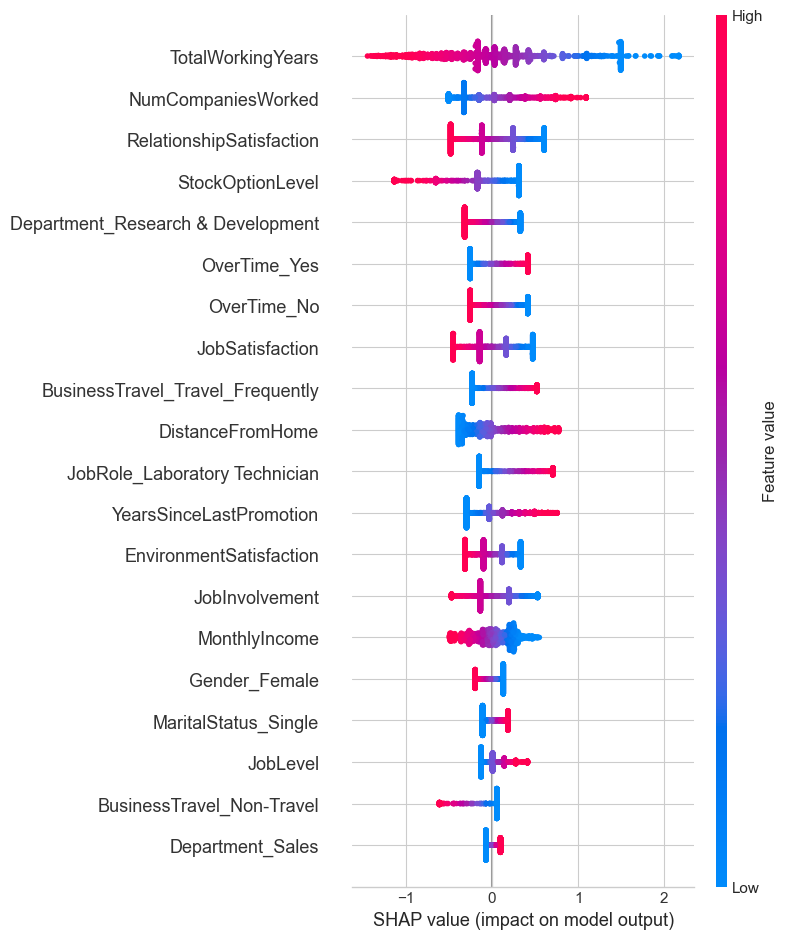

In [1736]:
# Buat explainer untuk model linear
explainer = shap.LinearExplainer(best_model, X_train_res, feature_names=X.columns)

# Hitung SHAP values
shap_values = explainer.shap_values(X_train_res)

# Visualisasi summary plot
shap.summary_plot(shap_values, X_train_res)

### 6. Predicting

In [1737]:
df_test = pd.read_csv(r"C:\Users\Bagas\Documents\My Room\Semester 5\SML\Week 6\tugas-1-sml-a-2025\test.csv")
df_test

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,CM617,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,...,3,80,1,1,2,3,1,0,0,0
1,PJ010,44,Travel_Rarely,1117,Research & Development,2,1,Life Sciences,1,1246,...,4,80,1,10,5,3,10,5,7,7
2,GJ831,31,Travel_Rarely,688,Sales,7,3,Life Sciences,1,613,...,3,80,1,10,3,2,5,4,0,1
3,JD352,44,Travel_Rarely,1199,Research & Development,4,2,Life Sciences,1,1288,...,4,80,2,26,4,2,25,9,14,13
4,WZ263,36,Travel_Rarely,318,Research & Development,9,3,Medical,1,90,...,1,80,1,2,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,ED286,43,Travel_Rarely,244,Human Resources,2,3,Life Sciences,1,1778,...,2,80,0,10,5,3,9,7,1,8
290,LQ713,44,Travel_Rarely,170,Research & Development,1,4,Life Sciences,1,1903,...,4,80,1,10,5,3,2,0,2,2
291,RZ361,36,Travel_Rarely,1456,Sales,13,5,Marketing,1,1733,...,2,80,3,16,3,3,2,2,2,2
292,IF234,56,Travel_Rarely,1255,Research & Development,1,2,Life Sciences,1,1441,...,4,80,1,5,3,4,3,2,1,0


In [1738]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        294 non-null    object
 1   Age                       294 non-null    int64 
 2   BusinessTravel            294 non-null    object
 3   DailyRate                 294 non-null    int64 
 4   Department                294 non-null    object
 5   DistanceFromHome          294 non-null    int64 
 6   Education                 294 non-null    int64 
 7   EducationField            294 non-null    object
 8   EmployeeCount             294 non-null    int64 
 9   EmployeeNumber            294 non-null    int64 
 10  EnvironmentSatisfaction   294 non-null    int64 
 11  Gender                    294 non-null    object
 12  HourlyRate                294 non-null    int64 
 13  JobInvolvement            294 non-null    int64 
 14  JobLevel                  

In [1739]:
X_test_pred = df_test.drop(["id", "EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, errors="ignore")

In [1740]:
# Samakan kolom dan tipe data
X_test_pred[cat_cols] = X_test_pred[cat_cols].astype(str).fillna("missing")

# Log Tranformation
for c in skewed_feats:
    # Cegah error kalau kolom nggak ada atau ada nilai negatif
    if c in X_test_pred.columns:
        X_test_pred[c] = np.log1p(X_test_pred[c])

# Transform pakai scaler & encoder hasil training
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_pred[num_cols]),
    columns=num_cols,
    index=X_test_pred.index
)

X_test_encoded = pd.DataFrame(
    encoder.transform(X_test_pred[cat_cols]),
    columns=encoder.get_feature_names_out(cat_cols),
    index=X_test_pred.index
)

# Gabungkan dan samakan urutan kolom
final_columns = X.columns
X_test_pred = pd.concat([X_test_scaled, X_test_encoded], axis=1)
X_test_pred = X_test_pred.reindex(columns=final_columns, fill_value=0)

print("✅ Data baru siap dipakai untuk prediksi")
print(X_test_pred.shape)

✅ Data baru siap dipakai untuk prediksi
(294, 26)


In [1741]:
y_pred = cal.predict(X_test_pred)

In [1742]:
# Ambil kolom id asli
df_result = pd.DataFrame({
    'id': pd.read_csv(r"C:\Users\Bagas\Documents\My Room\Semester 5\SML\Week 6\tugas-1-sml-a-2025\test.csv")['id'],
    'Attrition': y_pred
})

# Simpan ke CSV
df_result.to_csv(r"C:\Users\Bagas\Documents\My Room\Semester 5\SML\Week 6\tugas-1-sml-a-2025\Submission.csv", index=False)

##### ---